# Naive Bayes Classification 

# Business Understanding 
## Spam or Ham: SMS messages dataset 

Link to dataset: 

Objective: To explore Gaussian Naive Bayes and to build a model that can classigy SMS messages as spam or ham.
Success Criteria: A model with high accuracy that can filter out spam or ham messages. 

# Data Understanding 

Data Collection: The spam.csv dataset contains SMS messages labeled as spam or ham.
Data Description: The dataset has two columns: v1 (label) and v2 (SMS text).
Data Exploration: Explore the dataset to understand its size, structure, and distribution of labels.

# Data Preparation 

Data Cleaning: Handled any missing values or duplicated SMS messages.
Feature Engineering: The text data is converted into numerical data using the CountVectorizer technique from sklearn.feature_extraction.text.
Train-Test Split: The data is split into training and testing sets using train_test_split from sklearn.model_selection

# Modelling
Model Selection: The Gaussian Naive Bayes algorithm was chosen for this task.
Model Training: The chosen model was trained on the training data using model.fit(X_train.toarray(), y_train).
Model Evaluation: The model's performance on the testing data was evaluated using accuracy score as a metric. 

# Evaluation 
Model Performance: The model's performance was evaluated using the accuracy score, which measures the proportion of correctly classified instances out of the total instances. The accuracy score obtained was 0.9004484304932735.

# Deployment 
Serialize the trained model for deployment.
Create a simple web application to classify new text documents using the serialized model.

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Gaussian Naive Bayes

# Changing the following data:
For the first part of changing this dataset I decided to make the following changes to it:
- n_samples=1000: Specifies the total number of data points to generate, which was originally set to 100 but I decided to set it to 1000.
- centers=10: Indicates the number of clusters to generate. The data points will be distributed among 10 clusters unlike in the previous version where the clusters where set to 2.
- cluster_std=3.5: Defines the standard deviation of the clusters. A higher value of cluster_std results in clusters that are more spread out, in this scenario I have changed the original value of 1.5 to 3.5. 


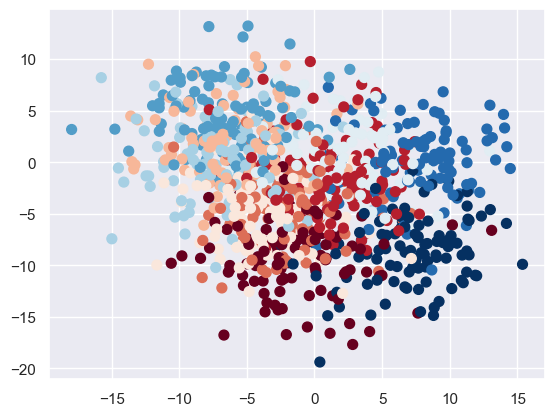

In [16]:
from sklearn.datasets import make_blobs
X, y = make_blobs(1000, 2, centers=10, random_state=2, cluster_std=3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')

In [17]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

In [18]:
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

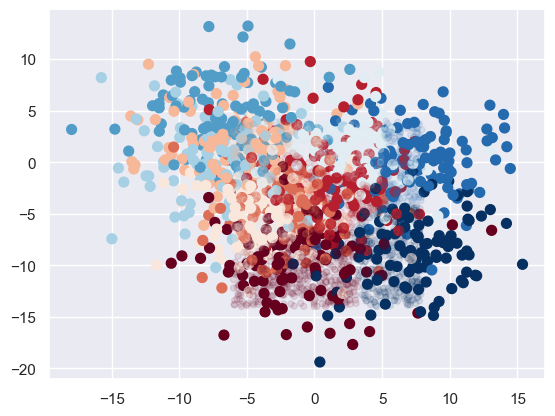

In [19]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

# Adding In A Dataset For the Gussian Naive Bayes 

In [20]:
import os
import pandas as pd

# Specify the appropriate encoding parameter
data = pd.read_csv("spam.csv", encoding='latin1')

# Display the data
print(data)


        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [21]:
df = pd.DataFrame(data) 
  
display(df.drop_duplicates())

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [22]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

# Extract features and target variable in spam.csv
X = data['v2']  # SMS text
y = data['v1']  # Spam or ham label

In [23]:
# convert the text data into numerical data
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(X)


In [24]:
# Split the data into training and testing data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [25]:
# Initialize and train the Gaussian Naive Bayes model
model = GaussianNB()
model.fit(X_train.toarray(), y_train)


GaussianNB()

In [53]:
# Make predictions on the test set
y_pred = model.predict(X_test.toarray())



In [28]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9004484304932735


In [32]:
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt